In [2]:
import finesse
from finesse.components import Laser, Lens, Nothing, Space
import matplotlib.pyplot as plt

from pprint import pprint

W_UPPER_BOUND = (2**0.5)*(1e-3)/4

In [3]:
def setup_optics(n_mirrors, cavity_length):
    M = finesse.model.Model()
    M.lambda0 = 1550e-9

    start = Laser("L_1550", P=1, f=(300e6)/(1550e-9))
    mirrors = [Lens(f"m{n}", f=0.5) for n in range(0, n_mirrors)]
    M.add([start, *mirrors])
    
    s_start_m0 = Space("s_start_m0", portA=start.p1, portB=mirrors[0].p1, L=cavity_length/2)
    M.add(s_start_m0)
   
    ports = M.get_open_ports()
    spaces = [Space(f"s_m{n}", portA=ports[n], portB=ports[n+1], L=cavity_length) for n in range(0, 2*(n_mirrors-1), 2)]
    M.add(spaces)
    
    return M
    

In [4]:
M = setup_optics(10, 0.5)

○ L_1550
╰──○ m0 (L_1550.p1 ↔ m0.p1)
   ╰──○ m1 (m0.p2 ↔ m1.p1)
      ╰──○ m2 (m1.p2 ↔ m2.p1)
         ╰──○ m3 (m2.p2 ↔ m3.p1)
            ╰──○ m4 (m3.p2 ↔ m4.p1)
               ╰──○ m5 (m4.p2 ↔ m5.p1)
                  ╰──○ m6 (m5.p2 ↔ m6.p1)
                     ╰──○ m7 (m6.p2 ↔ m7.p1)
                        ╰──○ m8 (m7.p2 ↔ m8.p1)
                           ╰──○ m9 (m8.p2 ↔ m9.p1)


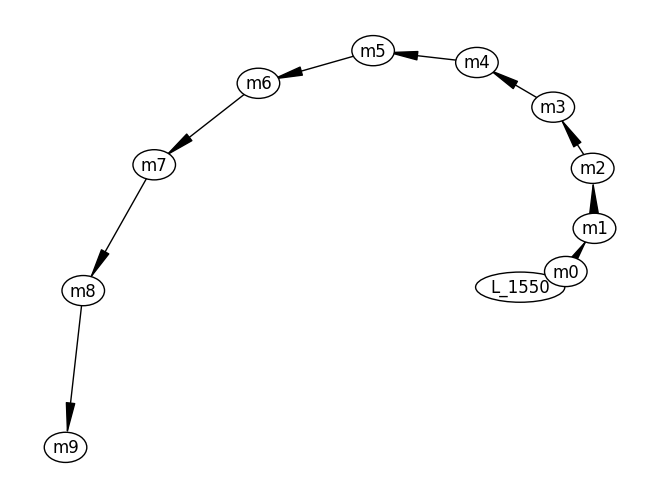

In [5]:
print(M.component_tree(show_ports=True))
M.plot_graph(graphviz=False, arrows=True, layout="spiral")


In [6]:
cavity_lengths = [0.25,  0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
cavity_lengths = [0.5, 1]
nodes = M.optical_nodes
beam_path = M.path(nodes[1], nodes[-1])

q_i = finesse.gaussian.BeamParam(wavelength=1550e-9, w0=W_UPPER_BOUND,z=0)

sim = M.propagate_beam(path=beam_path, symbolic=True, q_in=q_i)

(<'s_start_m0' @ 0x7fd8111e4380 (Space)>,
 <'s_m0' @ 0x7fd80c16aa20 (Space)>,
 <'s_m2' @ 0x7fd80c16ae40 (Space)>,
 <'s_m4' @ 0x7fd80c16b200 (Space)>,
 <'s_m6' @ 0x7fd80c16b560 (Space)>,
 <'s_m8' @ 0x7fd80c16b920 (Space)>,
 <'s_m10' @ 0x7fd80c16bce0 (Space)>,
 <'s_m12' @ 0x7fd80c188050 (Space)>,
 <'s_m14' @ 0x7fd80c188380 (Space)>,
 <'s_m16' @ 0x7fd80c188680 (Space)>)


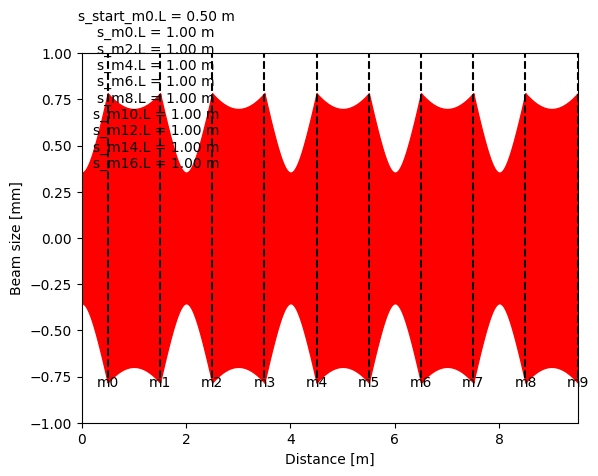

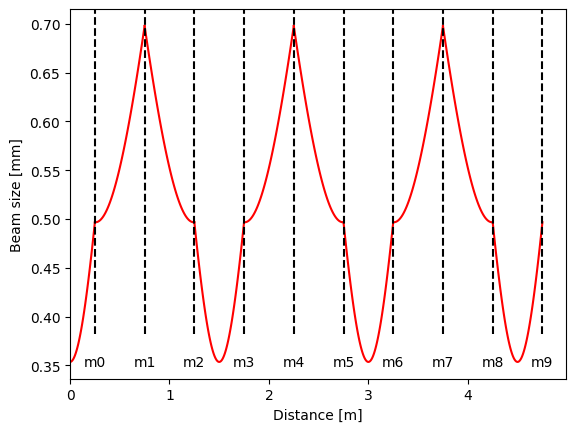

In [17]:
plt.rcParams["animation.html"] = "jshtml"
spaces = M.get_elements_of_type(Space)
pprint(spaces)
fig, ax, anim = sim.animate({spaces[0].L: [L/2 for L in cavity_lengths]} | {space.L: cavity_lengths for space in spaces[1:]}, "beamsize", show=False)

for length in cavity_lengths:
    _, a = sim.plot_beamsizes()
ax.set_ylim(-1,1)
plt.close()
from IPython.display import HTML
HTML(anim.to_jshtml())